In [2]:
import dcgan
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
model1 = dcgan.DCGAN()

In [4]:
andi_train_x = np.load('./dataset/andi_train_x.npy')
andi_train_y = np.load('./dataset/andi_train_y.npy')

<ipython-input-4-9903ebe70d40>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_dataset = andi_train_x[classes[CLASS]]


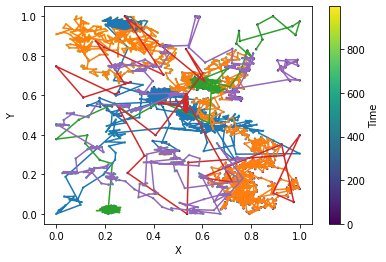

In [4]:
CLASS = 0
classes = [[] for i in range(5)]
for i in range(5):
    classes[i].append(np.argwhere(andi_train_y == i).reshape(-1))
train_dataset = andi_train_x[classes[CLASS]]
for i in range(len(train_dataset)):
    train_dataset[i] = preprocessing.minmax_scale(train_dataset[i])
model1.plt_tracks(train_dataset)

columns: 11 
rows: 999


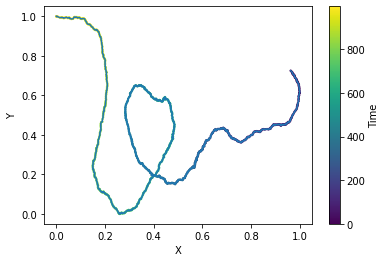

In [11]:
swimmers = pd.read_csv('./dataset/swimmers2um.csv')
#swimmers2 = pd.read_csv('swimmers2um.csv')
#swimmers5 = pd.read_csv('swimmers5um.csv')

col = swimmers.iloc[0, :].size
row = swimmers.iloc[:, 0].size
print('columns: %d \nrows: %d' %(col, row))

list_dataset = []

for i in range(1, int((col+1)/2)):
    X = [] # clear X
    X.append(preprocessing.minmax_scale(swimmers.iloc[:, i*2-1]))# X
    X.append(preprocessing.minmax_scale(swimmers.iloc[:, i*2]))# Y
    list_dataset.append(np.array(X).T)

train_dataset = np.array(list_dataset).reshape(5, 999, 2)

model1.plt_tracks(train_dataset[0:1])

In [16]:
    train_dataset[0]

array([[9.62905324e-01, 7.24340256e-01],
       [9.65983266e-01, 7.20247000e-01],
       [9.68572003e-01, 7.17354698e-01],
       ...,
       [2.06852649e-03, 9.97563389e-01],
       [8.54074565e-04, 9.98281388e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [63]:
def msd(tracks):
    ts = []
    for track in tracks:
        t = []
        for i in range(1, len(track)):
            dx = abs(track[i][0] - track[0][0])
            dy = abs(track[i][1] - track[0][1])
            t.append([dx, dy])
        ts.append(t)
    return ts

AttributeError: 'list' object has no attribute 'size'